# $t$-Tests

<img src="https://imgs.xkcd.com/comics/correlation_2x.png" alt="xkcd" width="500"/>

In [40]:
# Numerical arrays.
import numpy as np

# Statistical functions.
import scipy.stats as stats

# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

# Statistical plots.
import seaborn as sns

## Normal Data

[numpy.random.normal](https://numpy.org/doc/2.0/reference/random/generated/numpy.random.normal.html)



In [41]:
# # Group A.
# group_a = np.random.normal(5, 2, 30)

# # Group B.
# group_b = np.random.normal(5, 2, 30)

# try:
# group_a = np.random.normal(7, 2, 30) # mean, std, n
# group_b = np.random.normal(3, 2, 30)

# try:
group_a = np.random.normal(0.07, 0.02, 30) # mean, std, n
group_b = np.random.normal(0.03, 0.02, 30)

# Show.
group_a, group_b

(array([0.07089601, 0.06712792, 0.05505315, 0.05020304, 0.04038598,
        0.08430896, 0.08352611, 0.0616831 , 0.06990859, 0.09929963,
        0.06921616, 0.05105237, 0.04140126, 0.10279417, 0.03550273,
        0.07252254, 0.07329566, 0.07494202, 0.06196159, 0.11343835,
        0.09111334, 0.05753113, 0.07908453, 0.0687907 , 0.04059621,
        0.08233301, 0.04784773, 0.07265967, 0.09401474, 0.06967635]),
 array([-0.00064878,  0.02065613,  0.03569844,  0.07482319,  0.03515696,
         0.04165424,  0.05257203,  0.02881304,  0.0067844 , -0.02549912,
         0.04313154,  0.02878445,  0.04645966,  0.04979777,  0.05104909,
         0.03563674,  0.03049967,  0.03587585,  0.03289502,  0.04715565,
         0.01377178,  0.01700569,  0.05917115,  0.04516914,  0.03788495,
         0.00649843,  0.02112442,  0.06308192,  0.03616082,  0.0204411 ]))

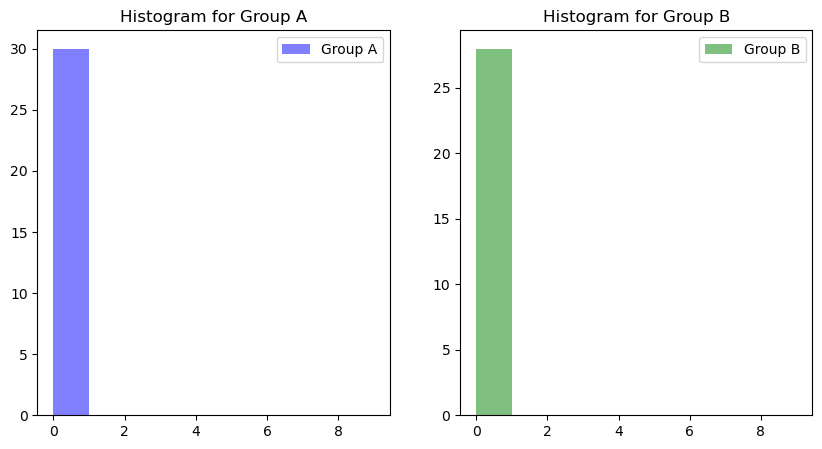

In [42]:
# Create an empty data frame.
#fig, ax = plt.subplots(2,1) # dont have to do subplot if just 1 plot, but can do 2 plots on 1 figure
# try:
#fig, ax = plt.subplots(1,2)
fig, ax = plt.subplots(1,2, figsize=(10, 5))

# Create histogram.
ax[0].hist(group_a, bins=range(10), color='blue', alpha=0.5, label='Group A')
ax[0].set_title('Histogram for Group A')
ax[0].legend()

# Create histogram.
ax[1].hist(group_b, bins=range(10), color='green', alpha=0.5, label='Group B');
ax[1].set_title('Histogram for Group B')
ax[1].legend()

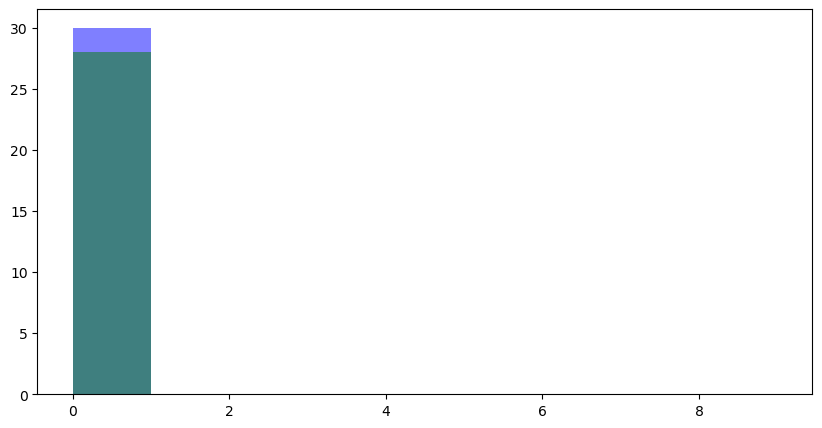

In [43]:
# Create an empty data frame.
fig, ax = plt.subplots(figsize=(10, 5)) # dont have to do subplot if just 1 plot, but can do 2 plots on 1 same axis

# Create histogram.
ax.hist(group_a, bins=range(10), color='blue', alpha=0.5, label='Group A') # alpha is transparency

# Create histogram.
ax.hist(group_b, bins=range(10), color='green', alpha=0.5, label='Group B');

# if bins=10 but the start and finish dont allign bc they start at the smallest number in each dataset
# so use range(10)

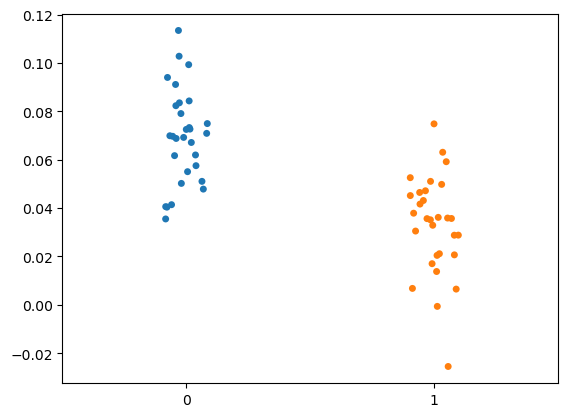

In [44]:
# Create a strip plot.
sns.stripplot(data=[group_a, group_b]);

# orage looks lower than blue, but significant overlaps too

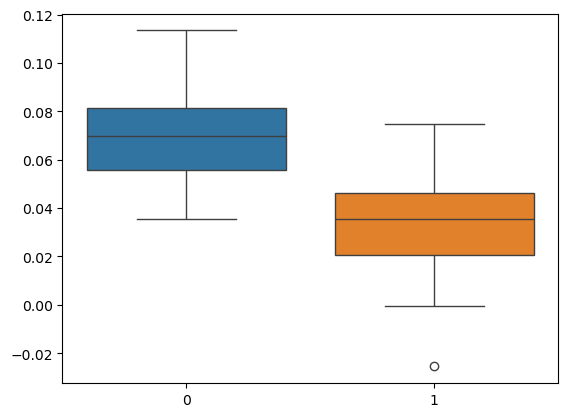

In [45]:
# Box plot.
sns.boxplot(data=[group_a, group_b]);

# order the values
# line in box is median
# box contains 50% of values, 23 higher, 25 lower
# whisker - 1.5 times from inbox height (interquartile range)
# there can be outlieers beyond whiskers

## Independent Samples $t$-Test

[scipy.stats.
ttest_ind](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#ttest-ind)

**Null Hypothesis:** the population means are equal.

In [46]:
# Perform a t-test.
stats.ttest_ind(group_a, group_b)

# tvalue is dimensionless, no units
# pvalue says, whats the probability of seeing a value as extreme as 8.13?
# pvalue is so small
# so if cut off is 0.05, 
# the probability of seeing data as extreme as i've seen is < 0.05, 
# im rejecting null hypo, so means are not equal
# look at student's t probability distribution,
# most of the values are under the curve, but we are way out in the tail5
# so im going to reject the idea that we are actually in the situation where the population means are equal

TtestResult(statistic=7.042704214370633, pvalue=2.4849292730157072e-09, df=58.0)

In [47]:
# Group c.
group_c = np.random.normal(5, 2, 30)

# Group d.
group_d = np.random.normal(5, 2, 30)

# Perform a t-test.
stats.ttest_ind(group_c, group_d)

TtestResult(statistic=0.5235119918390364, pvalue=0.6026126109827248, df=58.0)

the pvalue of seeing the value as extreme as 0.5223 is 60% (higher than treshold), so we have no evidence to reject null, so means are equal

## End